## Ejemplos 

Ahora estamos listos para ver cómo el álgebra matricial puede ser útil al analizar datos. Comenzamos con algunos ejemplos simples y finalmente llegamos al principal: cómo escribir modelos lineales con notación de álgebra matricial y resolver el problema de mínimos cuadrados.


#### El promedio

Para calcular el promedio de la muestra y la varianza de nuestros datos, usamos estas fórmulas $\bar{Y}=\frac{1}{N} Y_i$ y $\mbox{var}(Y)=\frac{1}{N} \sum_{i=1}^N (Y_i - \bar{Y})^2$. Podemos representarlos con la multiplicación de matrices. Primero, define esto $N \times 1$ matriz hecha solo de 1s:

$$ A=\begin{pmatrix}
1\\
1\\
\vdots\\
1
\end{pmatrix}
$$

Esto implica que:

$$
\frac{1}{N}
\mathbf{A}^\top Y = \frac{1}{N}
\begin{pmatrix}1&1&\dots&1\end{pmatrix}
\begin{pmatrix}
Y_1\\
Y_2\\
\vdots\\
Y_N
\end{pmatrix}=
\frac{1}{N} \sum_{i=1}^N Y_i
= \bar{Y}
$$

Tenga en cuenta que estamos multiplicando por el escalar $1/N$. En Python, multiplicamos matrices usando .dot():

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
father_son = pd.read_csv('https://raw.githubusercontent.com/jabernalv/Father-Son-height/master/Pearson.csv')
sheight = father_son.sheight
print('Media de las estaturas de los hijos calculada con mean', np.mean(sheight))
N = sheight.shape[0] # Tamaño del conjunto de datos
SHEIGHT = np.array(sheight) # Se convierte el conjunto de estaturas de los hijos a una matriz
A = np.array(np.repeat(1, N)) # Creamos una matriz de solo unos
mediaSHEIGHT = np.transpose(A).dot(SHEIGHT) / N # Multiplicación matricial y se divide entre el número de datos

print('Media de las estaturas de los hijos calculada con multiplicación matricial', mediaSHEIGHT)
# Como se puede ver se obtiene la media

Media de las estaturas de los hijos calculada con mean 68.68406965677181
Media de las estaturas de los hijos calculada con multiplicación matricial 68.6840696567718


Como veremos más adelante, multiplicar la transpuesta de una matriz por otra es muy común en estadística. En Python otra manera de realizarlo es usando la función T que devuelve la matriz transpuesta:

In [3]:
mediaSHEIGHT=A.T.dot(SHEIGHT) / N
print('Media de las estaturas de los hijos calculada con T y dividido por N', mediaSHEIGHT) 

Media de las estaturas de los hijos calculada con T y dividido por N 68.6840696567718


#### La varianza
Para la varianza, observamos que si:

$$
\mathbf{r}\equiv \begin{pmatrix}
Y_1 - \bar{Y}\\
\vdots\\
Y_N - \bar{Y}
\end{pmatrix}, \,\,
\frac{1}{N} \mathbf{r}^\top\mathbf{r} = 
\frac{1}{N}\sum_{i=1}^N (Y_i - \bar{Y})^2
$$
En R, si solo envía una matriz a `crossprod`, calcula: $r^\top r$, por lo que simplemente podemos escribir:

In [4]:
diferencias_con_media = sheight - mediaSHEIGHT # 
print(diferencias_con_media.T.dot(diferencias_con_media) / N)

7.915195757881051


Lo que es casi equivalente a:

In [5]:
import statistics
statistics.pvariance(sheight) 

7.915195757881051

#### Modelos lineales

Ahora estamos listos para poner todo esto en uso. Comencemos con el ejemplo de Galton. Si definimos estas matrices:
 
$$
\mathbf{Y} = \begin{pmatrix}
Y_1\\
Y_2\\
\vdots\\
Y_N
\end{pmatrix}
,
\mathbf{X} = \begin{pmatrix}
1&x_1\\
1&x_2\\
\vdots\\
1&x_N
\end{pmatrix}
,
\mathbf{\beta} = \begin{pmatrix}
\beta_0\\
\beta_1
\end{pmatrix} \mbox{ and }
\mathbf{\varepsilon} = \begin{pmatrix}
\varepsilon_1\\
\varepsilon_2\\
\vdots\\
\varepsilon_N
\end{pmatrix}
$$

Entonces podemos escribir el modelo:

$$
Y_i = \beta_0 + \beta_1 x_i + \varepsilon_i, i=1,\dots,N
$$

como:

$$
\,
\begin{matrix}
Y_1\\
Y_2\\
\vdots\\
Y_N
\end{matrix} =
\begin{matrix}
1&x_1\\
1&x_2\\
\vdots\\
1&x_N
\end{matrix}
\begin{matrix}
\beta_0\\
\beta_1
\end{matrix} +
\begin{matrix}
\varepsilon_1\\
\varepsilon_2\\
\vdots\\
\varepsilon_N
\end{matrix}
$$

o simplemente:
$$
\mathbf{Y}=\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon}
$$

que es una forma mucho más sencilla de escribirlo.


La formulacion de minimos cuadrados tambien se vuelve mas simple ya que es el siguiente producto cruzado:

$$
(\mathbf{Y}-\mathbf{X}\boldsymbol{\beta})^\top
(\mathbf{Y}-\mathbf{X}\boldsymbol{\beta})
$$

Así que ahora estamos listos para determinar qué valores de $\beta$ minimizan lo anterior, lo que podemos hacer usando cálculo para encontrar el mínimo.

#### Avanzado: Encontrar el mínimo usando cálculo

Hay una serie de reglas que nos permiten calcular ecuaciones en derivadas parciales en notación matricial. Igualando la derivada a 0 y resolviendo para $\beta$, tendremos nuestra solución. El único que necesitamos aquí nos dice que la derivada de la ecuación anterior es:

$$
2 \mathbf{X}^\top (\mathbf{Y} - \mathbf{X} \boldsymbol{\hat{\beta}})=0
$$

$$
\mathbf{X}^\top (\mathbf{Y} - \mathbf{X} \boldsymbol{\hat{\beta}})=\dfrac{0}{2}
$$

$$
\mathbf{X}^\top (\mathbf{Y} - \mathbf{X} \boldsymbol{\hat{\beta}})=0
$$

$$
\mathbf{X}^\top \mathbf{Y} - \mathbf{X}^\top \mathbf{X} \boldsymbol{\hat{\beta}}=0
$$

$$
\mathbf{X}^\top \mathbf{Y} = \mathbf{X}^\top \mathbf{X} \boldsymbol{\hat{\beta}}
$$

$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

y tenemos nuestra solución. Por lo general, ponemos un sombrero en el $\beta$ que resuelve esto, $\hat{\beta}$ , ya que es una estimación del $\beta$ "real" que generó los datos.

Recuerda que los mínimos cuadrados son como un cuadrado (multiplicar algo por sí mismo) y que esta fórmula es similar a la derivada de $f(x)^2$ siendo $2f(x)f\prime (x)$.


#### Encontrar LSE en Python

Veamos cómo funciona en Python:

In [6]:
father_son = pd.read_csv('https://raw.githubusercontent.com/jabernalv/Father-Son-height/master/Pearson.csv')
x=np.array(father_son.fheight)[..., None]
y=np.array(father_son.sheight)[..., None]
N = y.shape[0] # Tamaño del conjunto de datos
unos = np.array(np.repeat(1, N))[..., None]
X = np.concatenate((unos, x), axis=1)
betahat = np.linalg.solve(X.T.dot(X), X.T.dot(y))
print(betahat)

[[33.88660435]
 [ 0.51409304]]


Ahora podemos ver los resultados de esto calculando el $\hat{\beta}_0+\hat{\beta}_1 x$ estimado para cualquier valor de $x$:

Text(0, 0.5, 'Estaturas de los hijos')

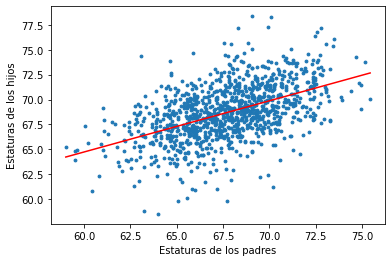

In [7]:
newx = np.linspace(min(x), max(x), num=100)
unos = np.array(np.repeat(1, 100))[..., None]
X = np.concatenate((unos, newx), axis=1)
fitted = X.dot(betahat)
plt.plot(newx, fitted, 'r')
plt.scatter(x, y, s = 8)
plt.xlabel('Estaturas de los padres')
plt.ylabel('Estaturas de los hijos')

Este $\hat{\boldsymbol{\beta}}=(\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}$ es uno de los resultados más utilizados en el análisis de datos. Una de las ventajas de este enfoque es que podemos usarlo en muchas situaciones diferentes. Por ejemplo, en nuestro problema de objetos que caen:

In [8]:
np.random.seed(1)
g = 9.8 # metros por segundo
n = 25
tt = np.linspace(0,3.4,num=n)[..., None] #time in secs, t is a base function
rands = np.random.normal(0,1, n)[..., None]
d = 56.67 - 0.5 * g * tt * tt + rands

Tenga en cuenta que estamos usando casi el mismo código exacto:

Text(0, 0.5, 'Altura')

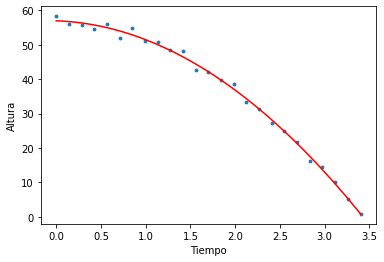

In [9]:
unos = np.array(np.repeat(1, n))[..., None]
X = np.concatenate((unos, tt, tt * tt), axis=1)
y = d
betahat = np.linalg.solve(X.T.dot(X), X.T.dot(y))
newtt = np.linspace(min(tt),max(tt),num=100)
unos = np.array(np.repeat(1, 100))[..., None]
X = np.concatenate((unos,newtt,newtt * newtt), axis=1)
fitted = X.dot(betahat)
plt.plot(newtt, fitted, 'r')
plt.scatter(tt, y, s = 8)
plt.xlabel('Tiempo')
plt.ylabel('Altura')

Y las estimaciones resultantes son las que esperamos:

In [10]:
print(betahat)

[[56.96693454]
 [-0.89409612]
 [-4.5923186 ]]


La Torre de Pisa tiene unos 56 metros de altura. Como solo estamos dejando caer el objeto, no hay velocidad inicial y la mitad de la constante de gravedad es 9,8/2 = 4,9 metros por segundo al cuadrado.

#### La función `LinearRegression`
En Python sklearn tiene una función muy conveniente que se adapta a estos modelos. Aprenderemos más sobre esta función más adelante, pero aquí hay una vista previa:

In [11]:
X = np.concatenate((tt, tt * tt), axis=1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fit=model.fit(X, y)
print(fit.intercept_)
print(fit.coef_)

[56.96693454]
[[-0.89409612 -4.5923186 ]]


Nótese que obtenemos los mismos valores que arriba.

#### Resumen

Hemos mostrado cómo escribir modelos lineales usando álgebra lineal. Vamos a hacer esto con varios ejemplos, muchos de los cuales están relacionados con experimentos diseñados. También demostramos cómo obtener estimaciones de mínimos cuadrados. No obstante, es importante recordar que debido a que $y$ es una variable aleatoria, estas estimaciones también son aleatorias. En una sección posterior, aprenderemos cómo calcular el error estándar para estas estimaciones y utilizarlo para realizar inferencias.